In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
%matplotlib inline

### Processed tweets with stopwords

In [20]:
tweets = pd.read_csv("processed_train.csv")
test = pd.read_csv("processed_test.csv")

In [7]:
tweets.head(1)

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake m...,1


In [10]:
vectorizer = CountVectorizer(ngram_range=(1,2), lowercase=True, max_features=5000)
train_vectors_sw = vectorizer.fit_transform(tweets['text'])

In [11]:
vectorizer = CountVectorizer(ngram_range=(1,2), lowercase=True, max_features=5000, stop_words='english')
train_vectors_no_sw = vectorizer.fit_transform(tweets['text'])

### SVD

* With stopwords

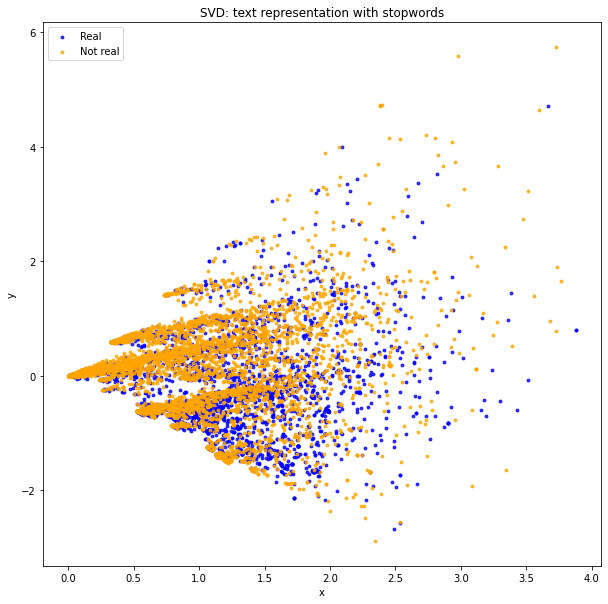

In [123]:
svd = TruncatedSVD(n_components=2)
svd.fit(train_vectors_sw)
svd_result = svd.transform(train_vectors_sw)
to_plot = pd.DataFrame({'x': svd_result[:, 0], 'y': svd_result[:, 1], 'target': tweets['target']})
to_plot.reset_index(inplace=True, drop=True)
ax = to_plot[to_plot['target'] == 1].plot.scatter(x='x', y='y', s=8, alpha=0.8, color='blue', label='Real', title='SVD: text representation with stopwords', figsize=(10, 10))
to_plot[to_plot['target'] == 0].plot.scatter(x='x', y='y', s=8, alpha=0.8, color='orange', label='Not real', ax=ax)

* Without

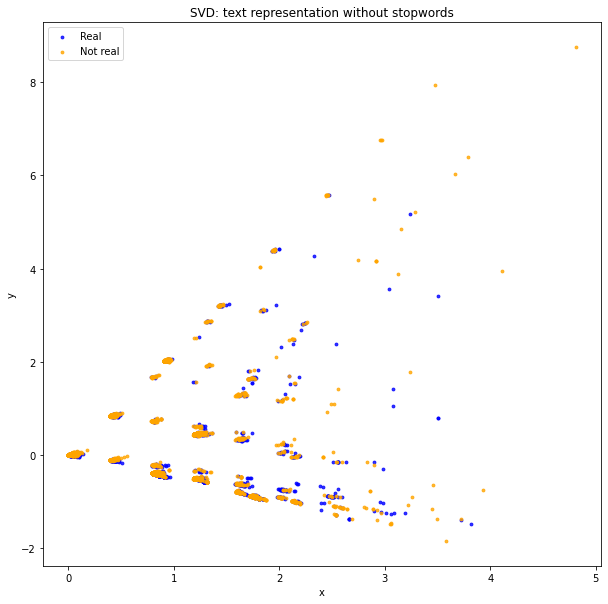

In [124]:
svd = TruncatedSVD(n_components=2)
svd.fit(train_vectors_no_sw)
svd_result = svd.transform(train_vectors_no_sw)
to_plot = pd.DataFrame({'x': svd_result[:, 0], 'y': svd_result[:, 1], 'target': tweets['target']})
to_plot.reset_index(inplace=True, drop=True)
ax = to_plot[to_plot['target'] == 1].plot.scatter(x='x', y='y', s=8, alpha=0.8, color='blue',title='SVD: text representation without stopwords', label='Real', figsize=(10, 10))
to_plot[to_plot['target'] == 0].plot.scatter(x='x', y='y', s=8, alpha=0.8, color='orange', label='Not real', ax=ax)

### TSNE

* With stopwords

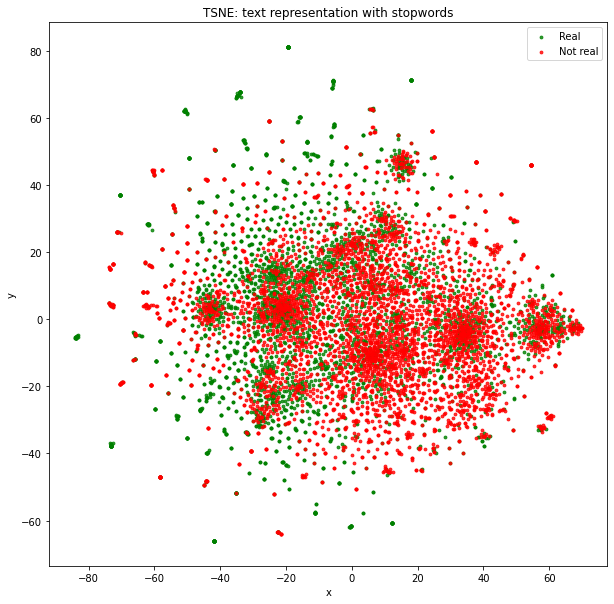

In [125]:
svd_result = TSNE(n_components=2).fit_transform(train_vectors_sw)
to_plot = pd.DataFrame({'x': svd_result[:, 0], 'y': svd_result[:, 1], 'target': tweets['target']})
to_plot.reset_index(inplace=True, drop=True)
ax = to_plot[to_plot['target'] == 1].plot.scatter(x='x', y='y', s=8, alpha=0.8, color='green', title='TSNE: text representation with stopwords', label='Real', figsize=(10, 10))
to_plot[to_plot['target'] == 0].plot.scatter(x='x', y='y', s=8, alpha=0.8, color='red', label='Not real', ax=ax)

* Without

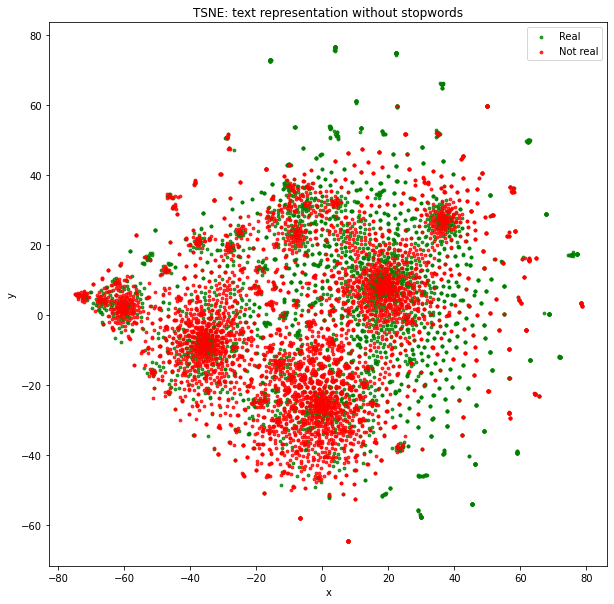

In [126]:
svd_result = TSNE(n_components=2).fit_transform(train_vectors_no_sw)
to_plot = pd.DataFrame({'x': svd_result[:, 0], 'y': svd_result[:, 1], 'target': tweets['target']})
to_plot.reset_index(inplace=True, drop=True)
ax = to_plot[to_plot['target'] == 1].plot.scatter(x='x', y='y', s=8, alpha=0.8, color='green',title='TSNE: text representation without stopwords', label='Real', figsize=(10, 10))
to_plot[to_plot['target'] == 0].plot.scatter(x='x', y='y', s=8, alpha=0.8, color='red', label='Not real', ax=ax)

### UMAP

Text(0, 0.5, 'y')

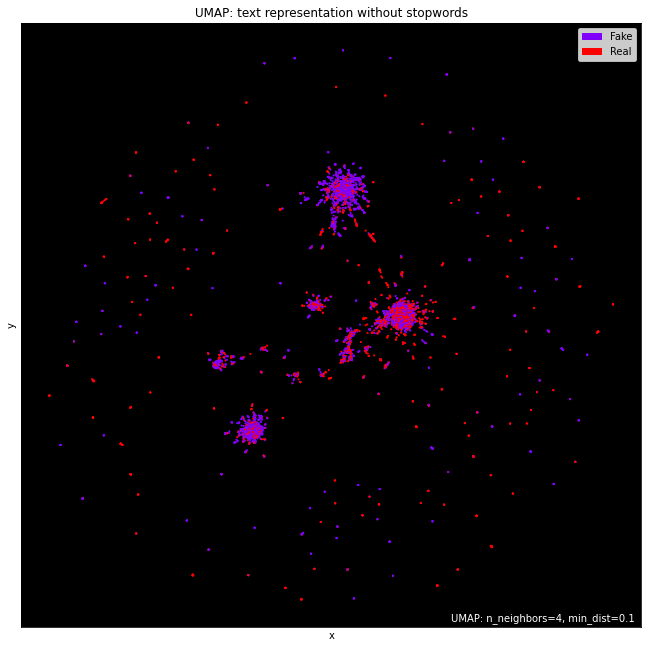

In [160]:
import umap
mapper = umap.UMAP(n_neighbors=4).fit(train_vectors_no_sw)
import umap.plot
plot = umap.plot.points(mapper, labels= tweets.target.map(lambda x: 'Real' if x == 1 else 'Fake') , theme='fire')
plot.set_title('UMAP: text representation without stopwords')
plot.set_xlabel('x')
plot.set_ylabel('y')

### Color code clusters

In [109]:
tweets_features = pd.read_csv("train_features.csv")
test_features = pd.read_csv("test_features.csv")
tweets_raw = pd.read_csv("train.csv")
test_raw = pd.read_csv("test.csv")

In [110]:
tweets_features.drop(columns=['text', 'text_without_stopwords'], inplace=True)

In [111]:
tweets_features

,id,length,avg_word_length,amount_of_words,amount_of_unique_words,sentiment,stopwords_count,punctuation_count,mentions_count,hashtags_count,longest_word_length_without_stopwords,stopword_word_ratio,adjectives_count,nouns_count,verbs_count,adverbs_count
0,1,69,4.384615,13,13,0.2732,6,1,0,1,7,0.461538,0,6,1,0
1,4,38,4.571429,7,7,-0.3400,0,1,0,0,6,0.000000,0,6,0,0
2,5,133,5.090909,22,20,-0.2960,11,3,0,0,10,0.500000,1,7,7,0
3,6,65,7.125000,8,8,0.0000,1,2,0,1,10,0.125000,1,4,1,0
4,7,88,4.500000,16,15,0.0000,7,2,0,2,6,0.437500,0,6,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,10863,136,6.210526,19,19,-0.6841,6,12,0,1,10,0.315789,0,13,3,0
7430,10864,114,3.423077,26,25,-0.4939,16,1,0,0,8,0.615385,2,4,5,3
7431,10866,121,5.100000,20,18,-0.7650,1,11,0,0,8,0.050000,0,14,0,0
7432,10869,83,6.636364,11,11,-0.4939,2,5,0,0,8,0.181818,2,6,1,0


In [112]:
tweets_raw

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [113]:
to_colorcode = tweets_raw.merge(tweets_features, left_on='id', right_on='id', how='right')
to_colorcode.head()

,id,keyword,location,text,target,length,avg_word_length,amount_of_words,amount_of_unique_words,sentiment,stopwords_count,punctuation_count,mentions_count,hashtags_count,longest_word_length_without_stopwords,stopword_word_ratio,adjectives_count,nouns_count,verbs_count,adverbs_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,4.384615,13,13,0.2732,6,1,0,1,7,0.461538,0,6,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,4.571429,7,7,-0.3400,0,1,0,0,6,0.000000,0,6,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,5.090909,22,20,-0.2960,11,3,0,0,10,0.500000,1,7,7,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,7.125000,8,8,0.0000,1,2,0,1,10,0.125000,1,4,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,4.500000,16,15,0.0000,7,2,0,2,6,0.437500,0,6,3,1


In [114]:
to_colorcode.fillna('null', inplace = True)

In [115]:
import re

def has_url(text):
    return re.match(r'https?:\/\/\S+\b|www\.(\w+\.)+\S*', text) is not None

In [141]:
REAL = 1
R_MENTION = 'Real with mention'
F_MENTION = 'Fake with mention'
R_HASHTAG = 'Real with hashtag'
F_HASHTAG = 'Fake with hashtag'
R_URL = 'Real with URL'
F_URL = 'Fake with URL'
R_SW = 'Real with stopwords'
F_SW = 'Fake with stopwords'
R_NO_LOC = 'Real with no location'
F_NO_LOC = 'Fake with no location'
R_NO_KEY = 'Real with no keyword'
F_NO_KEY = 'Fake with no keyword'

In [145]:
def color_code(row):
    target = row.target
    
    if row.mentions_count > 0: # Mentions
        return R_MENTION if target == REAL else F_MENTION
    
    elif row.hashtags_count > 0: # Hashtags
        return R_HASHTAG if target == REAL else F_HASHTAG
    
    elif has_url(row.text): # Url
        return R_URL if target == REAL else F_URL
    
    elif row.stopwords_count > 0: # Stopwords
        return R_SW if target == REAL else F_SW
    
    elif row.location == 'null': # No location
        return R_NO_LOC if target == REAL else F_NO_LOC
    
    elif row.keyword == 'null': #No keyword
        return R_NO_KEY if target == REAL else F_NO_KEY
    else:
        return 'Real' if target == REAL else 'Fake'

In [146]:
to_colorcode['color'] = to_colorcode.apply(color_code, axis=1)

In [147]:
to_colorcode.color.value_counts()

Fake with stopwords      2082
Real with stopwords      1664
Fake with mention        1349
Real with hashtag         686
Real with mention         658
Fake with hashtag         634
Fake                      108
Fake with no location      98
Real                       70
Real with no location      51
Real with URL              21
Fake with URL              13
Name: color, dtype: int64

* hellinger metric
* n_neighbors: resolution parameter

Text(0, 0.5, 'y')

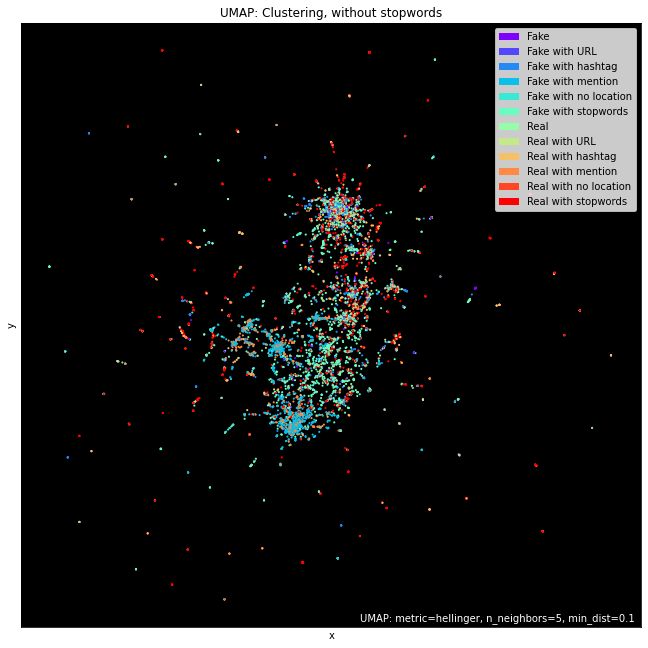

In [158]:
import umap
mapper = umap.UMAP(metric='hellinger', n_neighbors=5).fit(train_vectors_no_sw)
import umap.plot
plot = umap.plot.points(mapper, labels=to_colorcode.color, theme='fire')
plot.set_title('UMAP: Clustering, without stopwords')
plot.set_xlabel('x')
plot.set_ylabel('y')

Text(0, 0.5, 'y')

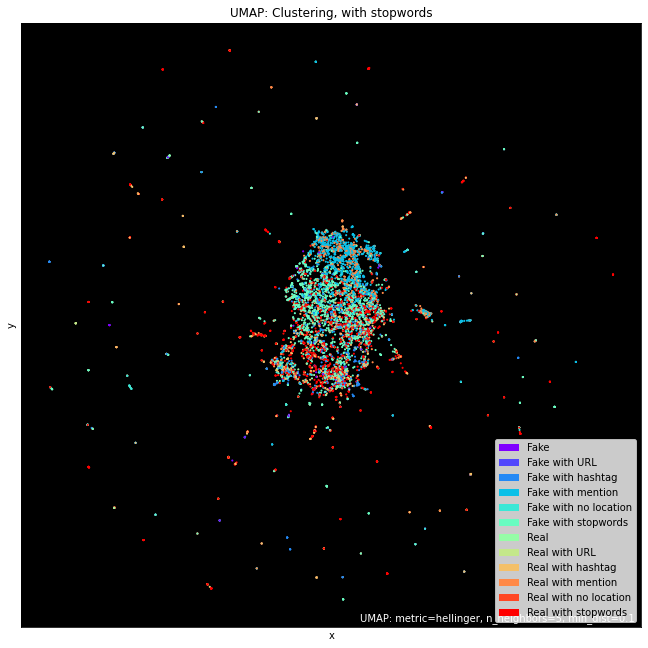

In [159]:
import umap
mapper = umap.UMAP(metric='hellinger', n_neighbors=5).fit(train_vectors_sw)
import umap.plot
plot = umap.plot.points(mapper, labels=to_colorcode.color, theme='fire')
plot.set_title('UMAP: Clustering, with stopwords')
plot.set_xlabel('x')
plot.set_ylabel('y')